In [2]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns

In [3]:
df=pd.read_csv('algerian_forest.csv')

In [4]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [5]:
df=df.drop(['day','month','year'],axis=1)

In [6]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df['Classes']=np.where(df['Classes'].str.contains("not fire"),0,1)

In [9]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [10]:
x=df.drop('FWI',axis=1)
y=df['FWI']

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [12]:
x_train.corr()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Unnamed: 0,1.000000,0.222788,-0.367511,-0.187296,-0.055222,0.244364,0.271848,0.072597,0.317535,0.201261,0.196463,0.867030
Temperature,0.222788,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.367511,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.187296,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.055222,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.244364,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.271848,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.072597,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.317535,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.201261,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897


<Axes: >

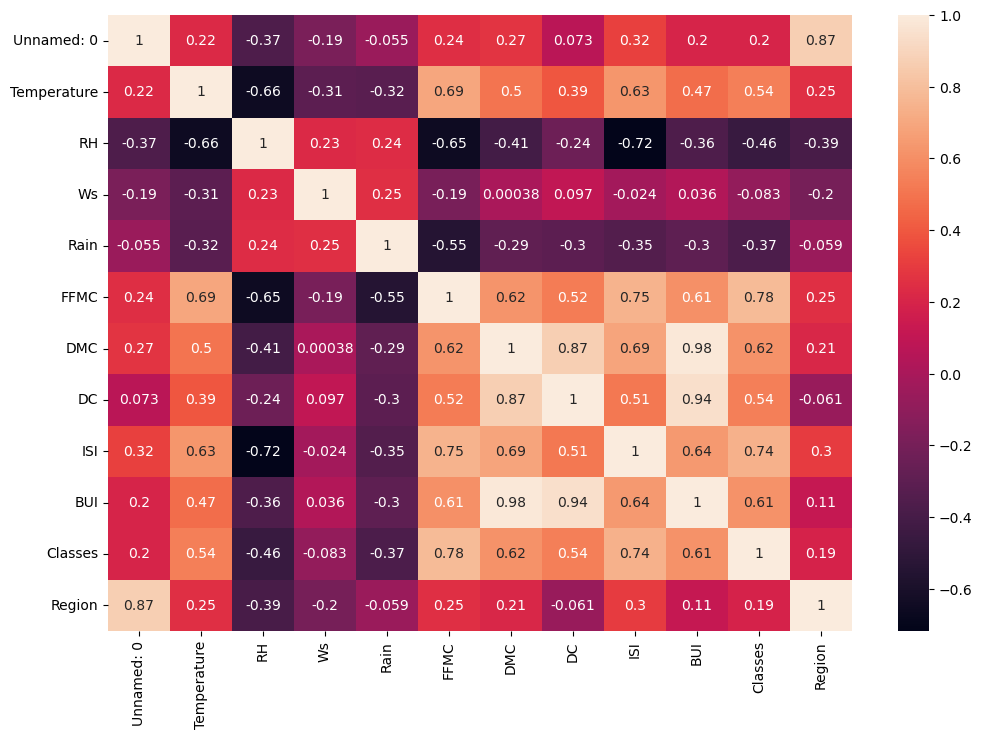

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(x_train.corr(),annot=True)

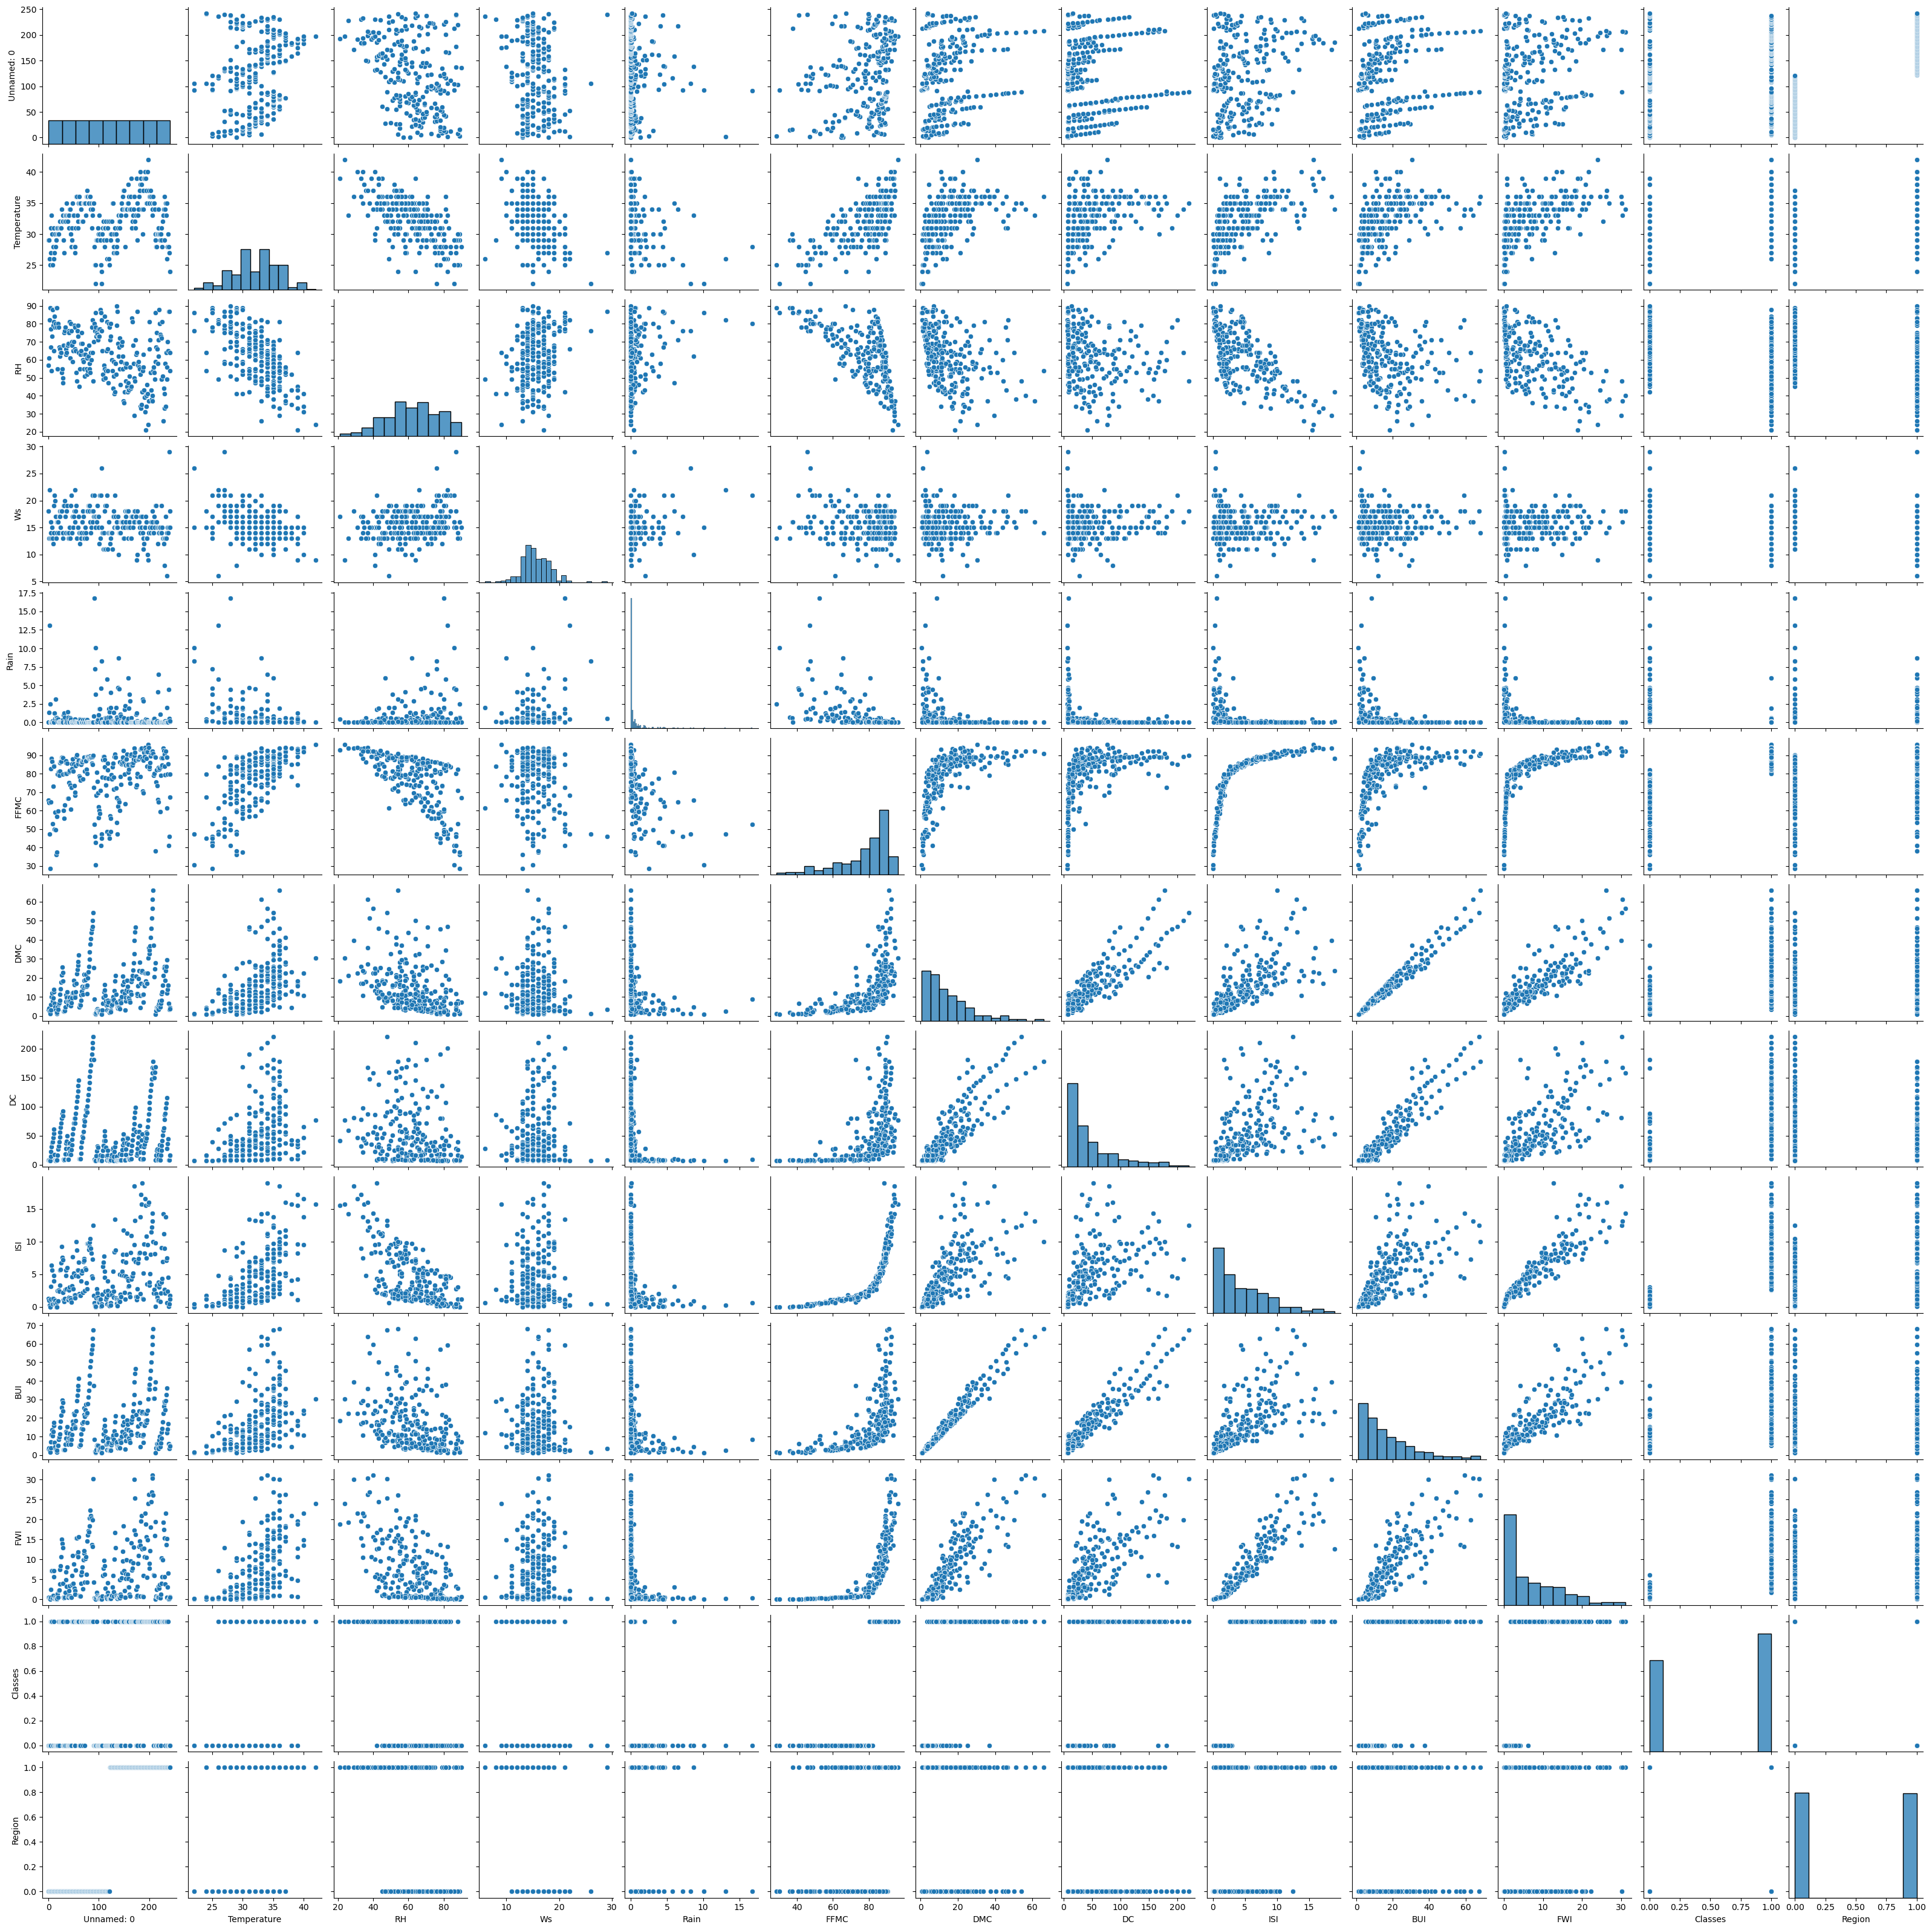

In [14]:
sns.pairplot(df)

In [15]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [16]:
corr_features=correlation(x_train,0.85)

In [17]:
corr_features

{'BUI', 'DC', 'Region'}

In [18]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 9), (61, 9))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

Text(0.5, 1.0, 'after scaling')

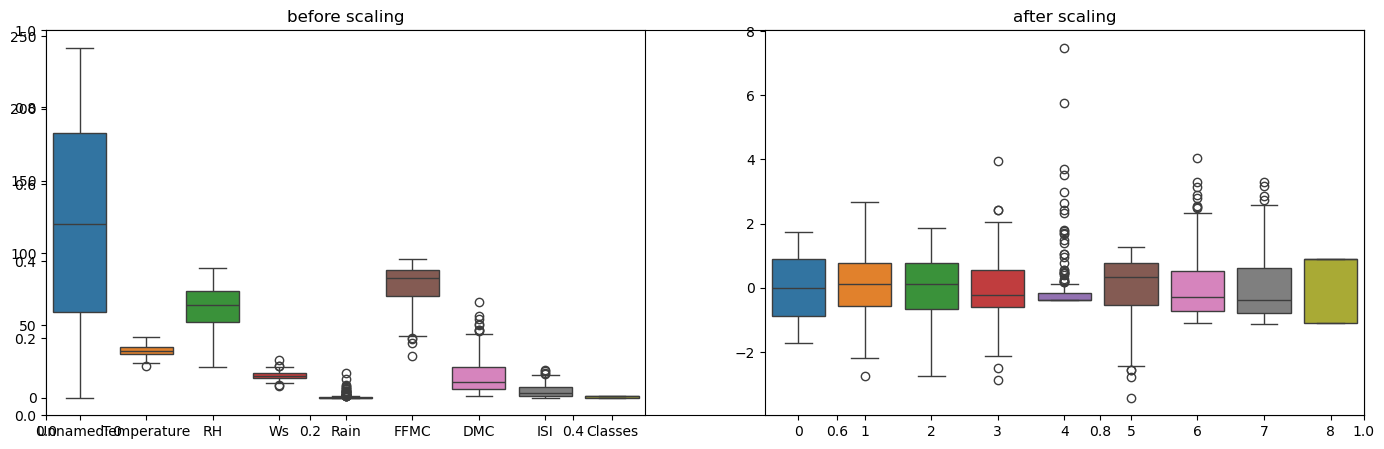

In [20]:
plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('before scaling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('after scaling')

In [37]:
df.dtypes

Unnamed: 0       int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int32
Region           int64
dtype: object

0.5310423080373838
0.6992551695146189
0.8362147867112963
0.9842013874151916


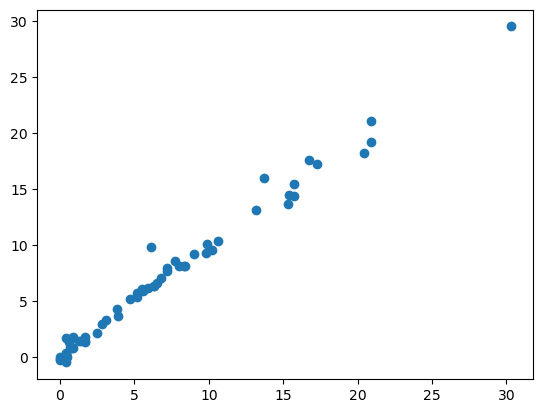

In [21]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_test_pred=linreg.predict(x_test_scaled)
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
print(mean_absolute_error(y_test,y_test_pred))
print(mean_squared_error(y_test,y_test_pred))
print(root_mean_squared_error(y_test,y_test_pred))
score=r2_score(y_test,y_test_pred)
print(score)
plt.scatter(y_test,y_test_pred)

1.1331797691846892 0.9492008839717639


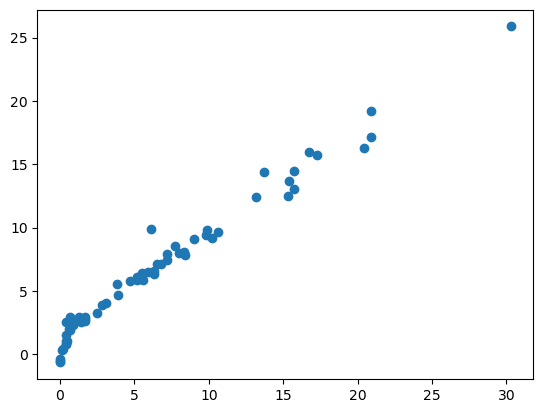

In [22]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_test_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_test_pred)
score=r2_score(y_test,y_test_pred)
print(mae,score)
plt.scatter(y_test,y_test_pred)

CV LASSO

In [23]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [24]:
lassocv.alpha_

0.05339519105601537

In [25]:
lassocv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [26]:
lassocv.mse_path_

array([[53.64536329, 65.39074075, 54.89628985, 77.90299066, 39.38236846],
       [46.99139716, 59.81506814, 49.29840831, 75.6645852 , 35.31758355],
       [41.14908917, 53.9178721 , 42.49594889, 68.35708298, 31.76996123],
       [36.05788169, 48.41773965, 36.66879347, 61.92819453, 28.67296816],
       [31.62067285, 42.76466229, 31.68391904, 56.26841266, 24.93183295],
       [27.75285367, 37.81922812, 27.42599138, 51.28216115, 21.56888645],
       [24.3807738 , 33.49107651, 23.7950306 , 45.25481907, 18.66094162],
       [21.44052804, 29.70161639, 20.70460191, 39.90418045, 16.14837778],
       [18.876308  , 26.38208059, 18.07969934, 35.23429953, 13.97821475],
       [16.63960395, 23.47341883, 15.85530749, 31.15712074, 12.10483403],
       [14.68819307, 20.92329068, 13.97555108, 27.59649208, 10.48862803],
       [12.98525144, 18.68636627, 12.39173305, 24.48611006,  9.09521221],
       [11.49893734, 16.72312788, 11.06186319, 21.7677198 ,  7.89445038],
       [10.2013182 , 14.9991189 ,  9.9

In [27]:
y_test_pred=lassocv.predict(x_test_scaled)

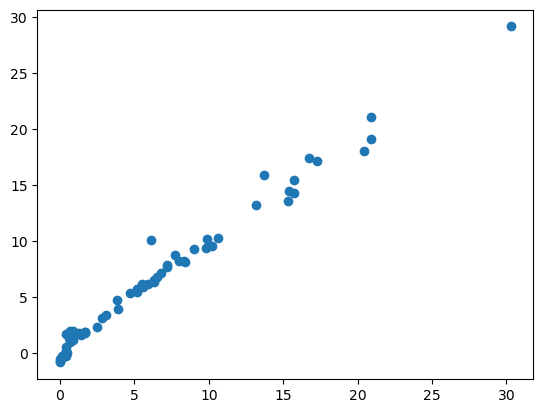

In [28]:
plt.scatter(y_test,y_test_pred)

In [29]:
residuals=y_test-y_test_pred
residuals

24     0.301069
6     -0.424822
152    0.493312
232   -0.931854
238   -0.301955
         ...   
162   -0.380707
178   -0.237286
224    0.008108
230    0.965963
154   -0.259172
Name: FWI, Length: 61, dtype: float64

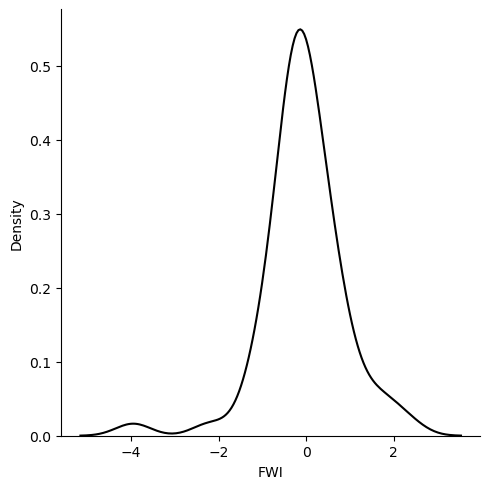

In [30]:
sns.displot(residuals,kind='kde',color='k')

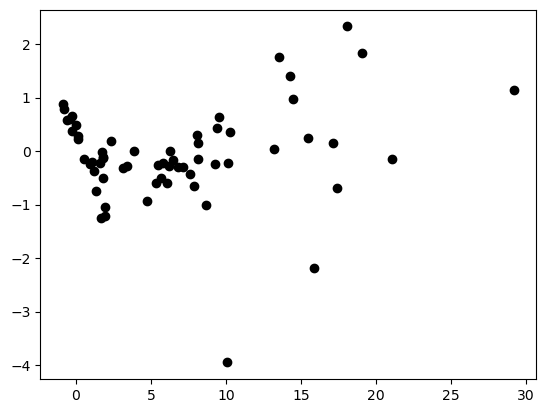

In [31]:
plt.scatter(y_test_pred,residuals,color='k')

In [32]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.9402363340844282

In [35]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(scaler,open('linreg.pkl','wb'))

mean absolute error 0.5523063707254504
r2 score 0.983676555604412


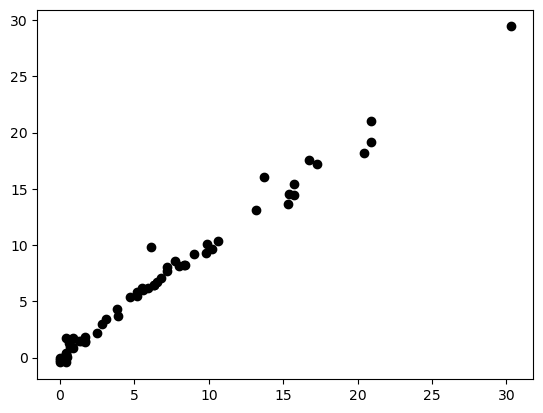

In [38]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_test_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_test_pred)
score=r2_score(y_test,y_test_pred)
print("mean absolute error", mae)
print("r2 score",score)
plt.scatter(y_test,y_test_pred,color="k")

mean_absolute_error 0.5523063707254504
r2_score 0.983676555604412


{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

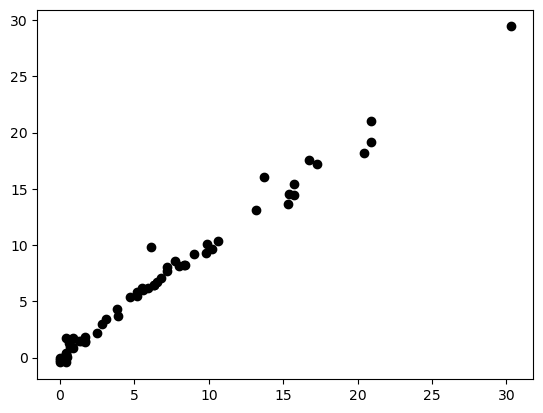

In [39]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_test_pred=ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_test_pred,color='k')
mae=mean_absolute_error(y_test,y_test_pred)
score=r2_score(y_test,y_test_pred)
print("mean_absolute_error", mae)
print("r2_score", score)
ridgecv.get_params()

mean_absolute_error 0.6525416416304306
r2_score 0.9805069854347187


0.04311146156383888

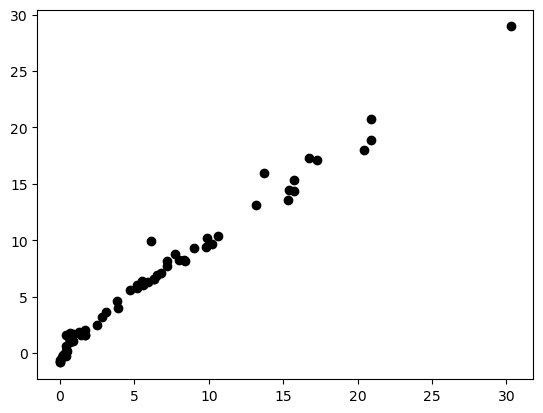

In [40]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train_scaled,y_train)
y_test_pred=elasticcv.predict(x_test_scaled)
plt.scatter(y_test,y_test_pred,color='k')
mae=mean_absolute_error(y_test,y_test_pred)
score=r2_score(y_test,y_test_pred)
print("mean_absolute_error", mae)
print("r2_score", score)
elasticcv.alpha_

In [41]:
scaler

StandardScaler()

In [42]:
ridge

Ridge()

In [43]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))